
params1 [4.4760e-03 9.7800e-08 4.7150e-04 1.0030e-07 7.9000e+01 2.6000e+00
 3.6986e+02]


covariance1 [[ 2.79477652e-07 -5.47637933e-12  1.43935431e-08 -3.20580256e-12
   4.16035016e-03  4.59225670e-04  1.79140108e-02]
 [-5.47637933e-12  1.17711693e-16 -3.11741801e-13  6.93833685e-17
  -9.28486052e-08 -9.80602992e-09 -3.87323002e-07]
 [ 1.43935431e-08 -3.11741801e-13  1.30060787e-09 -2.89294645e-13
   2.40308516e-04  3.71298395e-05  1.24980125e-03]
 [-3.20580256e-12  6.93833685e-17 -2.89294645e-13  6.48037724e-17
  -5.34158747e-08 -8.39534084e-09 -2.79908542e-07]
 [ 4.16035016e-03 -9.28486052e-08  2.40308516e-04 -5.34158747e-08
   1.30542065e+02  7.30393795e+00  3.03647723e+02]
 [ 4.59225670e-04 -9.80602992e-09  3.71298395e-05 -8.39534084e-09
   7.30393795e+00  1.45225067e+00  4.01840399e+01]
 [ 1.79140108e-02 -3.87323002e-07  1.24980125e-03 -2.79908542e-07
   3.03647723e+02  4.01840399e+01  1.52971928e+03]]


params2 [4.47600000e-03 9.97987719e-08 4.71500000e-04 1.00300000e-07
 7.900

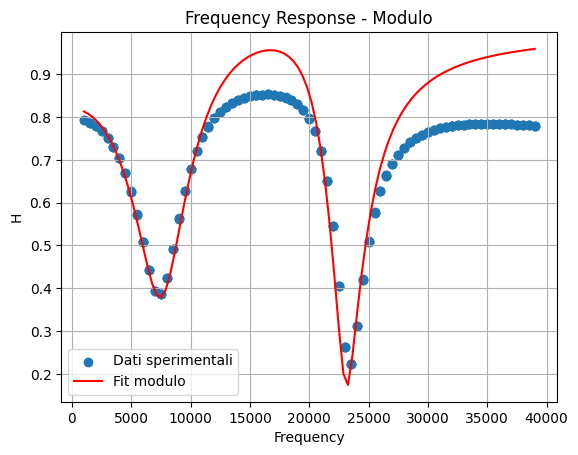

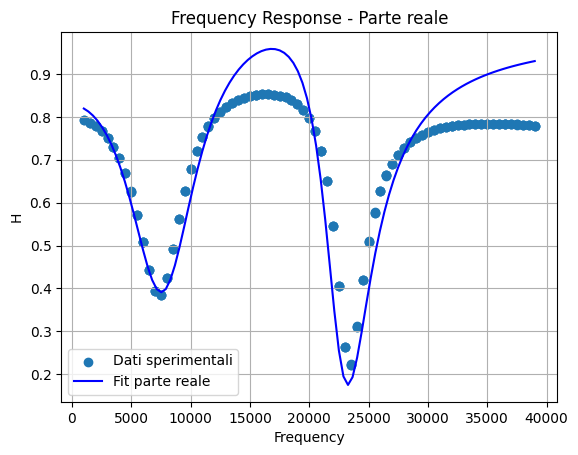

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


L1 = 4.576E-3
L2 = 481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
R = 379.86 #RESISTENZA 1
RL1 = 78.0
RL2 = 2.5


# Aprire il file in modalità di lettura
with open('notch_R2.txt', 'r') as file:
    # Leggere tutte le righe del file
    lines = file.readlines()

# Inizializzare le liste per memorizzare i dati
x_values = []
y_values = []

# Iterare attraverso le righe e estrarre i dati
for line in lines:
    # Dividere la riga in base agli spazi
    parts = line.split()
    # Convertire i valori in numerim reali e aggiungerli alle rispettive liste
    x_values.append(float(parts[0]))
    y_values.append(float(parts[1]))
     
     
    

def module(f, L1, C1, L2, C2, RL1, RL2, R):
    
    W =  2 * f * np.pi 
    A1 = 1 - W * W * L1 * C1
    A2 = 1 - W * W * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
     
    B1 = R + RL1 / ( A1 * A1 + D1 * D1 ) + RL2 / ( A2 * A2 + D2 * D2 )
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1 * A1 + D1 * D1 ) + ( A2 * W * L2 - RL2 * D2 )/( A2 * A2 + D2 * D2 )
    H = R / np.sqrt( B1 * B1 + B2 * B2 )
    
    return H 

def real_part(f, L1, C1, L2, C2, RL1, RL2, R):
    
    W =  2 * f * np.pi 
    A1 = 1 - W * W * L1 * C1
    A2 = 1 - W * W * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    
    B1 = R + RL1 / ( A1 * A1 + D1 * D1 ) + RL2 / ( A2 * A2 + D2 * D2 )
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1 * A1 + D1 * D1 ) + ( A2 * W * L2 - RL2 * D2 )/( A2 * A2 + D2 * D2 )
    H = R * B1 / ( B1 * B1 + B2 * B2 )
    
    return H 


# Eseguire il fit
params1, covariance1 = curve_fit(module, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R + 10]), maxfev=70000)
params2, covariance2 = curve_fit(real_part, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1,  R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R + 10]), maxfev=70000)

# Parametri del fit
a_fit1, b_fit1, c_fit1, d_fit1, e_fit1, f_fit1, g_fit1 = params1
a_fit2, b_fit2, c_fit2, d_fit2, e_fit2, f_fit2, g_fit2 = params2

a_err1, b_err1, c_err1, d_err1, e_err1, f_err1 , g_err1= covariance1
a_err2, b_err2, c_err2, d_err2, e_err2, f_err2, g_err2 = covariance2



print ("\nparams1", params1)
print ("\n\ncovariance1", covariance1)

print ("\n\nparams2", params2)
print ("\ncovariance2", covariance2)


# Plot dei dati sperimentali e del fit per il modulo
plt.figure(1)
plt.scatter(x_values, y_values, label='Dati sperimentali')
x_fit1 = np.linspace(min(x_values), max(x_values), 100)
y_fit1 = module(x_fit1, *params1)
plt.plot(x_fit1, y_fit1, color='red', label='Fit modulo')

plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response - Modulo')
plt.legend()
plt.grid()

# Plot dei dati sperimentali e del fit per la parte reale
plt.figure(2)
plt.scatter(x_values, y_values, label='Dati sperimentali')
x_fit2 = np.linspace(min(x_values), max(x_values), 100)
y_fit2 = real_part(x_fit2, *params2)
plt.plot(x_fit2, y_fit2, color='blue', label='Fit parte reale')

plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response - Parte reale')
plt.legend()
plt.grid()

plt.show()



params1 [4.47600000e-03 9.78000000e-08 4.71500000e-04 1.00300000e-07
 7.70000000e+01 3.50000000e+00 5.23988538e+02]


covariance1 [[ 1.54550746e-08 -3.26254182e-13  1.04725204e-09 -2.32675024e-13
   3.04127656e-04  3.62114331e-05  1.10921675e-03]
 [-3.26254182e-13  7.41666192e-18 -2.38700556e-14  5.30223819e-18
  -7.05320409e-09 -8.21686841e-10 -2.53203553e-08]
 [ 1.04725204e-09 -2.38700556e-14  1.12078188e-10 -2.48903209e-14
   2.21620805e-05  3.76657693e-06  9.81397993e-05]
 [-2.32675024e-13  5.30223819e-18 -2.48903209e-14  5.54876651e-18
  -4.92114776e-09 -8.41724744e-10 -2.18674278e-08]
 [ 3.04127656e-04 -7.05320409e-09  2.21620805e-05 -4.92114776e-09
   9.29494417e+00  7.55553962e-01  2.38522182e+01]
 [ 3.62114331e-05 -8.21686841e-10  3.76657693e-06 -8.41724744e-10
   7.55553962e-01  1.42537696e-01  3.42152218e+00]
 [ 1.10921675e-03 -2.53203553e-08  9.81397993e-05 -2.18674278e-08
   2.38522182e+01  3.42152218e+00  1.02218972e+02]]


params2 [4.48602083e-03 9.98000000e-08 4.715000

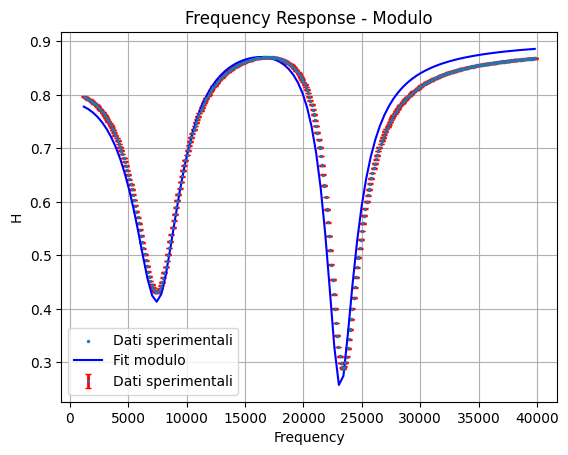

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


L1 = 4.576E-3
L2 = 481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
R = 520.53 #RESISTENZA 2
RL1 = 78.0
RL2 = 2.5




# Aprire il file in modalità di lettura
with open('notch_R2 def.txt', 'r') as file:
    # Leggere tutte le righe del file
    lines = file.readlines()

# Inizializzare le liste per memorizzare i dati
x_values = []
y_values = []

# Iterare attraverso le righe e estrarre i dati
for line in lines:
    # Dividere la riga in base agli spazi
    parts = line.split()
    # Convertire i valori in numerim reali e aggiungerli alle rispettive liste
    x_values.append(float(parts[0]))
    y_values.append(float(parts[1]))
     
errors = [0.0007] * len(y_values)

def module(f, L1, C1, L2, C2, RL1, RL2, R):
    
    W =  2 * f * np.pi 
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
     
    B1 = R + RL1 / ( A1**2 + D1**2 ) + RL2 / ( A2**2 + D2**2)
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1**2 + D1**2 ) + ( A2 * W * L2 - RL2 * D2 )/( A2**2 + D2**2)
    H = R / np.sqrt( B1**2+ B2**2 )
    
    return H * (R - 50)/ R

def real_part(f, L1, C1, L2, C2, RL1, RL2, R):
      
    W =  2 * f * np.pi 
    A1 = 1 - W**2 * L1 * C1
    A2 = 1 - W**2 * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
     
    B1 = R + RL1 / ( A1**2 + D1**2 ) + RL2 / ( A2**2 + D2**2)
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1**2 + D1**2 ) + ( A2 * W * L2 - RL2 * D2 )/( A2**2 + D2**2)    
    H = R * B1 / ( B1**2 + B2**2 )
    
    return H * (R - 50)/ R


# Eseguire il fit
# params1, covariance1 = curve_fit(module, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R + 10]), maxfev=70000)
# params2, covariance2 = curve_fit(real_part, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1,  R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R + 10]), maxfev=70000)

params1, covariance1 = curve_fit(module, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 1, R + 10]), maxfev=70000)
params2, covariance2 = curve_fit(real_part, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1,  R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 1, R + 10]), maxfev=70000)

# Parametri del fit
a_fit1, b_fit1, c_fit1, d_fit1, e_fit1, f_fit1, g_fit1 = params1
a_fit2, b_fit2, c_fit2, d_fit2, e_fit2, f_fit2, g_fit2 = params2

a_err1, b_err1, c_err1, d_err1, e_err1, f_err1 , g_err1= covariance1
a_err2, b_err2, c_err2, d_err2, e_err2, f_err2, g_err2 = covariance2


print ("\nparams1", params1)
print ("\n\ncovariance1", covariance1)

print ("\n\nparams2", params2)
print ("\ncovariance2", covariance2)

# Calcolo degli errori sui parametri del fit
errors_fit = np.sqrt(np.diag(covariance1))

# Grafico dei dati sperimentali
plt.errorbar(x_values, y_values, yerr=errors, fmt='o', markersize=1, elinewidth= 2, capsize= 2, ecolor= 'red' , label='Dati sperimentali')


# Plot dei dati sperimentali e del fit per il modulo
plt.figure(1)
plt.scatter(x_values, y_values, s= 2, label='Dati sperimentali')
x_fit1 = np.linspace(min(x_values), max(x_values), 100)
y_fit1 = module(x_fit1, *params1)
plt.plot(x_fit1, y_fit1, color='blue', label='Fit modulo')

plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response - Modulo')
plt.legend()
plt.grid()

# # Plot dei dati sperimentali e del fit per la parte reale
# plt.figure(2)
# plt.scatter(x_values, y_values, c='purple', s=10, label='Dati sperimentali')
# x_fit2 = np.linspace(min(x_values), max(x_values), 100)
# y_fit2 = real_part(x_fit2, *params2)
# plt.plot(x_fit2, y_fit2, color='#C8A2C8', label='Fit parte reale')

# plt.xlabel('Frequency')
# plt.ylabel('H')
# plt.title('Frequency Response - Parte reale')
# plt.legend()
# plt.grid()

plt.show()



params1 [4.4760e-03 9.7800e-08 4.7150e-04 1.0030e-07 7.7000e+01 2.6000e+00
 1.0372e+03]


covariance1 [[ 3.33412831e-07 -6.65366899e-12  5.94201723e-09 -1.35445437e-12
   6.47957249e-03  2.45553155e-04  4.21524339e-02]
 [-6.65366899e-12  1.53688197e-16 -1.30307085e-13  2.96657074e-17
  -1.55341446e-07 -5.31230894e-09 -9.45544687e-07]
 [ 5.94201723e-09 -1.30307085e-13  6.56219459e-10 -1.48795649e-13
   9.50415798e-05  2.86278643e-05  1.56829857e-03]
 [-1.35445437e-12  2.96657074e-17 -1.48795649e-13  3.41614802e-17
  -2.14925954e-08 -6.57663257e-09 -3.60561056e-07]
 [ 6.47957249e-03 -1.55341446e-07  9.50415798e-05 -2.14925954e-08
   2.60302795e+02  3.63296841e+00  7.78012484e+02]
 [ 2.45553155e-04 -5.31230894e-09  2.86278643e-05 -6.57663257e-09
   3.63296841e+00  1.54011413e+00  6.74013663e+01]
 [ 4.21524339e-02 -9.45544687e-07  1.56829857e-03 -3.60561056e-07
   7.78012484e+02  6.74013663e+01  1.01787338e+04]]


params2 [4.55127115e-03 9.78000000e-08 4.71500000e-04 1.00300000e-07
 7.700

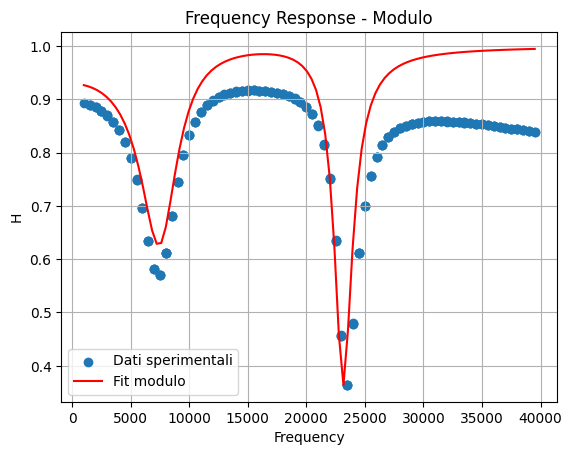

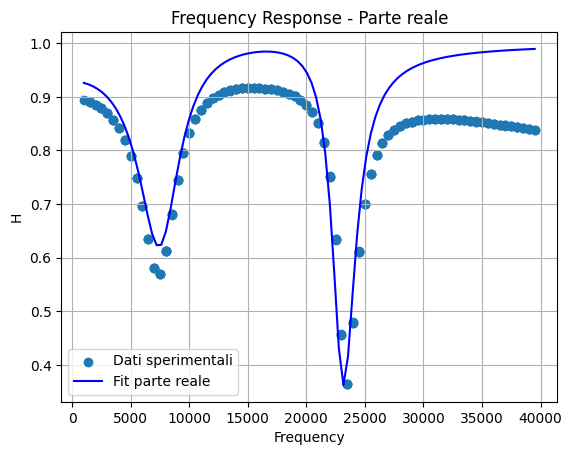

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


L1 = 4.576E-3
L2 = 481.5E-6
C1 = 98.8E-9
C2 = 101.3E-9
R = 997.2 +50 #RESISTENZA 3
RL1 = 78.0
RL2 = 2.5


# Aprire il file in modalità di lettura
with open('notch_R3.txt', 'r') as file:
    # Leggere tutte le righe del file
    lines = file.readlines()

# Inizializzare le liste per memorizzare i dati
x_values = []
y_values = []

# Iterare attraverso le righe e estrarre i dati
for line in lines:
    # Dividere la riga in base agli spazi
    parts = line.split()
    # Convertire i valori in numerim reali e aggiungerli alle rispettive liste
    x_values.append(float(parts[0]))
    y_values.append(float(parts[1]))
     

def module(f, L1, C1, L2, C2, RL1, RL2, R):
    
    W =  2 * f * np.pi 
    A1 = 1 - W * W * L1 * C1
    A2 = 1 - W * W * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
     
    B1 = R + RL1 / ( A1 * A1 + D1 * D1 ) + RL2 / ( A2 * A2 + D2 * D2 )
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1 * A1 + D1 * D1 ) + ( A2 * W * L2 - RL2 * D2 )/( A2 * A2 + D2 * D2 )
    H = R / np.sqrt( B1 * B1 + B2 * B2 )
    
    return H 

def real_part(f, L1, C1, L2, C2, RL1, RL2, R):
    
    W =  2 * f * np.pi 
    A1 = 1 - W * W * L1 * C1
    A2 = 1 - W * W * L2 * C2
    D1 = W * RL1 * C1
    D2 = W * RL2 * C2
    
    B1 = R + RL1 / ( A1 * A1 + D1 * D1 ) + RL2 / ( A2 * A2 + D2 * D2 )
    B2 = ( A1 * W * L1 - RL1 * D1 )/( A1 * A1 + D1 * D1 ) + ( A2 * W * L2 - RL2 * D2 )/( A2 * A2 + D2 * D2 )
    H = R * B1 / ( B1 * B1 + B2 * B2 )
    
    return H 


# Eseguire il fit
params1, covariance1 = curve_fit(module, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1, R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R + 10]), maxfev=70000)
params2, covariance2 = curve_fit(real_part, x_values, y_values, bounds=([L1 - 1E-4, C1 - 1E-9, L2 - 1E-5, C2 - 1E-9, RL1 - 1, RL2 - 0.1,  R - 10],[L1 + 1E-4, C1 + 1E-9, L2 + 1E-5, C2 + 1E-9, RL1 + 1, RL2 + 0.1, R + 10]), maxfev=70000)

# Parametri del fit
a_fit1, b_fit1, c_fit1, d_fit1, e_fit1, f_fit1, g_fit1 = params1
a_fit2, b_fit2, c_fit2, d_fit2, e_fit2, f_fit2, g_fit2 = params2

a_err1, b_err1, c_err1, d_err1, e_err1, f_err1 , g_err1= covariance1
a_err2, b_err2, c_err2, d_err2, e_err2, f_err2, g_err2 = covariance2

print ("\nparams1", params1)
print ("\n\ncovariance1", covariance1)

print ("\n\nparams2", params2)
print ("\ncovariance2", covariance2)


# Plot dei dati sperimentali e del fit per il modulo
plt.figure(1)
plt.scatter(x_values, y_values, label='Dati sperimentali')
x_fit1 = np.linspace(min(x_values), max(x_values), 100)
y_fit1 = module(x_fit1, *params1)
plt.plot(x_fit1, y_fit1, color='red', label='Fit modulo')

plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response - Modulo')
plt.legend()
plt.grid()

# Plot dei dati sperimentali e del fit per la parte reale
plt.figure(2)
plt.scatter(x_values, y_values, label='Dati sperimentali')
x_fit2 = np.linspace(min(x_values), max(x_values), 100)
y_fit2 = real_part(x_fit2, *params2)
plt.plot(x_fit2, y_fit2, color='blue', label='Fit parte reale')

plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response - Parte reale')
plt.legend()
plt.grid()

plt.show()


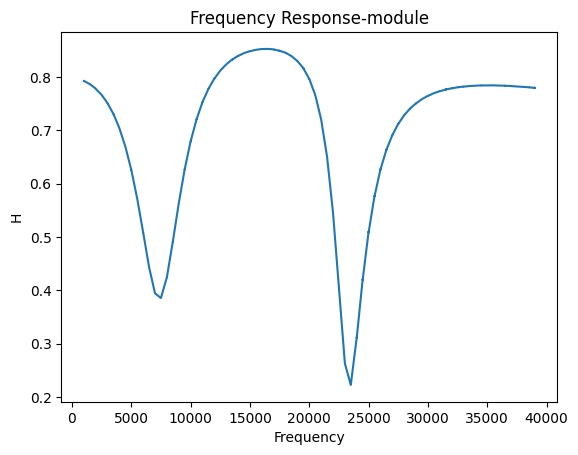

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Aprire il file in modalità di lettura
with open('notch_R2.txt', 'r') as file:
    # Leggere tutte le righe del file
    lines = file.readlines()

# Inizializzare le liste per memorizzare i dati
x_values = []
y_values = []

# Iterare attraverso le righe e estrarre i dati
for line in lines:
    # Dividere la riga in base agli spazi
    parts = line.split()
    # Convertire i valori in numeri interi e aggiungerli alle rispettive liste
    x_values.append(float(parts[0]))
    y_values.append(float(parts[1]))
    
plt.plot(x_values, y_values)  # Plot H values for current R
plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response-module')
    
plt.show()

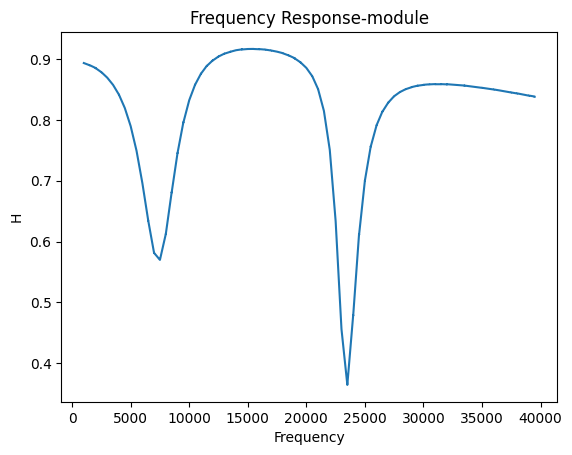

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Aprire il file in modalità di lettura
with open('notch_R3.txt', 'r') as file:
    # Leggere tutte le righe del file
    lines = file.readlines()

# Inizializzare le liste per memorizzare i dati
x_values = []
y_values = []

# Iterare attraverso le righe e estrarre i dati
for line in lines:
    # Dividere la riga in base agli spazi
    parts = line.split()
    # Convertire i valori in numeri interi e aggiungerli alle rispettive liste
    x_values.append(float(parts[0]))
    y_values.append(float(parts[1]))
    
plt.plot(x_values, y_values)  # Plot H values for current R
plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response-module')
    
plt.show()

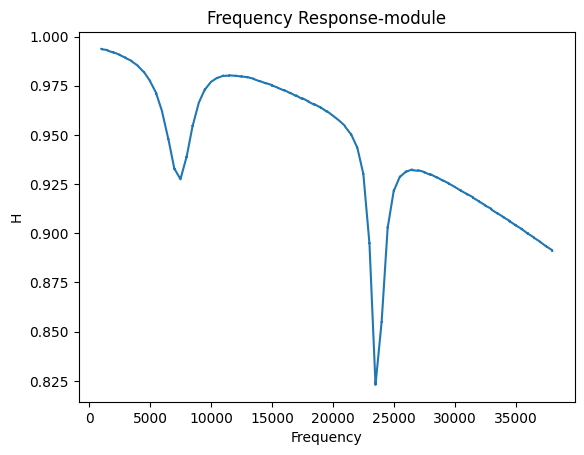

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Aprire il file in modalità di lettura
with open('notch_R4.txt', 'r') as file:
    # Leggere tutte le righe del file
    lines = file.readlines()

# Inizializzare le liste per memorizzare i dati
x_values = []
y_values = []

# Iterare attraverso le righe e estrarre i dati
for line in lines:
    # Dividere la riga in base agli spazi
    parts = line.split()
    # Convertire i valori in numeri interi e aggiungerli alle rispettive liste
    x_values.append(float(parts[0]))
    y_values.append(float(parts[1]))
    
plt.plot(x_values, y_values)  # Plot H values for current R
plt.xlabel('Frequency')
plt.ylabel('H')
plt.title('Frequency Response-module')
    
plt.show()